In [133]:
#Template to install a conda package in the current Jupyter kernel - just use conda within happyenv in anaconda prompt
import sys


#Template - install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install numpy

**Set Directory**

In [134]:
%cd C:\Users\noahc\Jupyter\FirstSteps

C:\Users\noahc\Jupyter\FirstSteps


In [135]:
sys.path

['C:\\Users\\noahc',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\python38.zip',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\DLLs',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv',
 '',
 'C:\\Users\\noahc\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\win32',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\noahc\\anaconda3\\envs\\happyenv\\lib\\site-packages\\Pythonwin']

**Import packages**

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from featurewiz import featurewiz
from sklearn.model_selection import *

**Import data, perform visual check**

In [137]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.head(4)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5


In [138]:
"""
# creating new feature with X1,X2 both 5
a = (df["X1"]==5)
b=(df["X2"]==5)
df['X1X2'] = a&b
df = df.replace(True, 1)
df = df.replace(False, 0)
"""

'\n# creating new feature with X1,X2 both 5\na = (df["X1"]==5)\nb=(df["X2"]==5)\ndf[\'X1X2\'] = a&b\ndf = df.replace(True, 1)\ndf = df.replace(False, 0)\n'

**Feature Engineering**

In [139]:
df['X1deg2'] = df['X1']**2
df['X2deg2'] = df['X2']**2
df['X3deg2'] = df['X3']**2
df['X1deg3'] = df['X1']**3
df['X2deg3'] = df['X2']**3
df['X3deg3'] = df['X3']**3
df['X1X2'] = df['X1'] * df['X2']
df['X1X3'] = df['X1'] * df['X3']
df['X2X3'] = df['X2'] * df['X3']
df['X1X2X3'] = df['X1'] * df['X2'] * df['X3']




In [140]:
df.head(40)

,Y,X1,X2,X3,X4,X5,X6,X1deg2,X2deg2,X3deg2,X1deg3,X2deg3,X3deg3,X1X2,X1X3,X2X3,X1X2X3
0,0,3,3,3,4,2,4,9,9,9,27,27,27,9,9,9,27
1,0,3,2,3,5,4,3,9,4,9,27,8,27,6,9,6,18
2,1,5,3,3,3,3,5,25,9,9,125,27,27,15,15,9,45
3,0,5,4,3,3,3,5,25,16,9,125,64,27,20,15,12,60
4,0,5,4,3,3,3,5,25,16,9,125,64,27,20,15,12,60
5,1,5,5,3,5,5,5,25,25,9,125,125,27,25,15,15,75
6,0,3,1,2,2,1,3,9,1,4,27,1,8,3,6,2,6
7,1,5,4,4,4,4,5,25,16,16,125,64,64,20,20,16,80
8,0,4,1,4,4,4,4,16,1,16,64,1,64,4,16,4,16
9,0,4,4,4,2,5,5,16,16,16,64,64,64,16,16,16,64


**Assign input and target variables**

In [141]:
inputs = df.drop('Y', axis='columns')
target = df['Y']

**Split the original data**

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.20, random_state=0)

**Select features from split data**

In [143]:
#X_selected_train=X_train.drop(columns=['X3','X6'])
#X_selected_test=X_test.drop(columns=['X3','X6'])

In [144]:
"""
X_train=train.drop('Y', axis='columns')
X_test=test.drop('Y', axis='columns')
y_train=train['Y']
y_test=test['Y']
"""

"\nX_train=train.drop('Y', axis='columns')\nX_test=test.drop('Y', axis='columns')\ny_train=train['Y']\ny_test=test['Y']\n"

**Scale all the data**

In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
inputs_sc = sc.fit_transform(inputs)
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [146]:
#Scale all the data
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X1_train2 = sc.fit_transform(X_selected_train)
#X1_test2 = sc.transform(X_selected_test)

**XGBoost Classifier**

In [147]:
from xgboost import XGBClassifier

xg = XGBClassifier(
    max_depth=2,
    gamma=2,
    eta=.8,
    reg_alpha=0.5,
    reg_lambda=0.5
)


In [148]:
xg.fit(X_train_sc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.8,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.800000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.5, ...)

In [149]:
xg.score(X_train_sc, y_train)

0.65

In [150]:
xg.score(X_test_sc, y_test)

0.5384615384615384

In [151]:
xg_pred = xg.predict(inputs_sc)

In [152]:
xg.score(X_test_sc, y_test)

0.5384615384615384

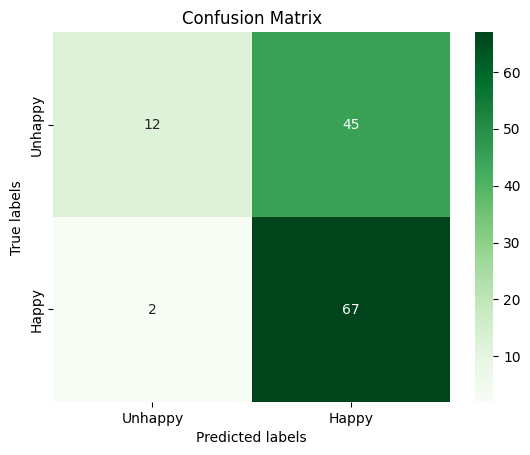

In [153]:
xg_cm = confusion_matrix(target, xg_pred)
ax= plt.subplot()
sns.heatmap(xg_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

**SVM Classifier**

In [154]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C=1.00095, gamma = 1e-15 )
svm.fit(X_train_sc, y_train)

SVC(C=1.00095, gamma=1e-15, kernel='linear')

In [155]:
svm.score(X_test_sc, y_test)

0.7307692307692307

In [156]:
svm.score(X_train_sc, y_train)

0.63

In [157]:
svm_pred = svm.predict(inputs_sc)

In [158]:
svm.predict(X_test_sc)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1], dtype=int64)

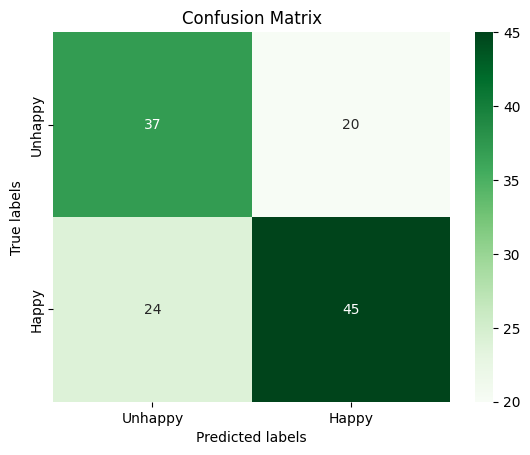

In [159]:
svm_cm = confusion_matrix(target, svm_pred)
ax= plt.subplot()
sns.heatmap(svm_cm, cmap = 'Greens', annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Unhappy','Happy']); ax.yaxis.set_ticklabels(['Unhappy', 'Happy']);

**End of fitted models**
rest of notebook is scratch

**Poly kernel for SVM (poor performance)**

In [160]:
polysvm= SVC(kernel = 'poly', C=1, gamma=.8, degree = 4)

In [161]:
polysvm.fit(X_train_sc, y_train)

SVC(C=1, degree=4, gamma=0.8, kernel='poly')

In [162]:
polysvm.score(X_test_sc, y_test)

0.5384615384615384

NameError: name 'IsolationForest' is not defined

In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_jobs=-1, random_state=1)
isf.fit(X_train_sc, y_train)

print(isf.score_samples(X_train_sc))

In [ ]:
outliers=isf.fit_predict(X_train_sc)

In [ ]:
mask = outliers != -1

In [ ]:
X_train_sc_no_outliers, y_train_no_outliers = X_train_sc[mask, :], y_train[mask]

**XG Without outliers**

In [ ]:
xg.fit(X_train_sc_no_outliers, y_train_no_outliers)

In [ ]:
xg.score(X_test_sc, y_test)

In [ ]:
"""
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.025,0.05,0.075], #so called `eta` value
              'max_depth': [2,3,4,5,6],
              'min_child_weight': [5,6,7,8,9],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], 
              'missing':[-999],
              'seed': [1337]}

XGB = XGBClassifier(random_state=0)
parameter_grid = {'learning_rate': [0.025,0.05,0.075],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5]}

cross_validation = StratifiedKFold(n_splits=3,random_state=0,shuffle=True)

grid_search_XGB = GridSearchCV(XGB,
                           param_grid=parameter_grid,
                           cv=cross_validation,
                            n_jobs=-1,
                            verbose=0)

grid_search_XGB.fit(X_train_sc, y_train)
print('Best score: {}'.format(grid_search_XGB.best_score_))
print('Best parameters: {}'.format(grid_search_XGB.best_params_))
"""

In [ ]:
"""
xg_grid = GridSearchCV(XGBClassifier(), parameters, n_jobs=5, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=2, refit=True)
"""

In [ ]:
#xg_grid.fit(X_train_sc, y_train)

In [ ]:
#xg_grid.score(X_test_sc,y_test)

In [ ]:
#xg_grid.best_params_

In [ ]:
y_train.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
xg.score(X_test_sc, y_test)

In [ ]:
from imblearn.over_sampling import SMOTE



In [ ]:
smote = SMOTE(sampling_strategy='minority', n_jobs=-1)


In [ ]:
X_sm, y_sm = smote.fit_resample(X_train_sc, y_train)

df01 = pd.DataFrame(X_sm)
df01['target'] = y_sm

df01['target'].value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
xg.fit(X_sm,y_sm)

In [ ]:
xg.score(X_test_sc,y_test)